Pump it Up: Data Mining the Water Table

http://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

The metric used for this competition is the classification rate, which calculates the percentage of rows where the predicted class ŷ 
 in the submission matches the actual class, y
 in the test set. The maximum is 1 and the minimum is 0. The goal is to maximize the classification rate.

Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize']  = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "/Users/gopora/MyStuff/Dev/Workspaces/PumpItUp"
IMAGES_DIR       = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout = True):
    if not os.path.isdir(IMAGES_DIR):
        os.makedirs(IMAGES_DIR)

    path = os.path.join(IMAGES_DIR, fig_id + ".png")

    print("Saving figure ...", fig_id)
    
    if tight_layout:
        plt.tight_layout()
    
    plt.savefig(path, format = 'png', dpi = 300)

Get the data

In [2]:
from six.moves import urllib

DATASETS_DIR        = os.path.join(PROJECT_ROOT_DIR, "datasets")
TRAINING_SET_VALUES = "pump_it_up_training_set_values.csv"
TRAINING_SET_LABELS = "pump_it_up_training_set_labels.csv"
TEST_SET_VALUES     = "pump_it_up_test_set_values.csv"

def fetch_pump_it_up_data():
    if not os.path.isdir(DATASETS_DIR):
        os.makedirs(DATASETS_DIR)
        
    print("Fetching training set values ...")

    root_url  = "https://s3.amazonaws.com/drivendata/data/7/public/"
    file_url  = root_url + "4910797b-ee55-40a7-8668-10efd5c1b960.csv"
    file_path = os.path.join(DATASETS_DIR, TRAINING_SET_VALUES)

    urllib.request.urlretrieve(file_url, file_path)
    
    print("Fetching training set labels ...")

    file_url  = root_url + "0bf8bc6e-30d0-4c50-956a-603fc693d966.csv"
    file_path = os.path.join(DATASETS_DIR, TRAINING_SET_LABELS)

    urllib.request.urlretrieve(file_url, file_path)

    print("Fetching test set values ...")

    file_url  = root_url + "702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv"
    file_path = os.path.join(DATASETS_DIR, TEST_SET_VALUES)

    urllib.request.urlretrieve(file_url, file_path)

In [3]:
fetch_pump_it_up_data()

Fetching training set values ...
Fetching training set labels ...
Fetching test set values ...


In [4]:
import pandas as pd

def load_pump_it_up_training_set_values():
    return pd.read_csv(os.path.join(DATASETS_DIR, TRAINING_SET_VALUES))

def load_pump_it_up_training_set_labels():
    return pd.read_csv(os.path.join(DATASETS_DIR, TRAINING_SET_LABELS))

def load_pump_it_up_test_set_values():
    return pd.read_csv(os.path.join(DATASETS_DIR, TEST_SET_VALUES))

In [5]:
trsv = load_pump_it_up_training_set_values()
trsl = load_pump_it_up_training_set_labels()
tesv = load_pump_it_up_test_set_values()

In [6]:
trs = pd.merge(trsv, trsl, on='id', how='left')

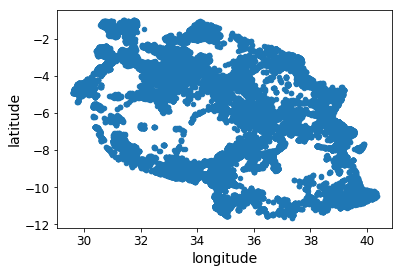

In [7]:
trs[trs.longitude > 25].plot(kind="scatter", x="longitude", y="latitude")

In [8]:
#trs.info().to_csv(os.path.join(DATASETS_DIR, "columns.csv"))
trs.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=None)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [9]:
trs["funder"].value_counts()

Government Of Tanzania           9084
Danida                           3114
Hesawa                           2202
Rwssp                            1374
World Bank                       1349
Kkkt                             1287
World Vision                     1246
Unicef                           1057
Tasaf                             877
District Council                  843
Dhv                               829
Private Individual                826
Dwsp                              811
0                                 777
Norad                             765
Germany Republi                   610
Tcrs                              602
Ministry Of Water                 590
Water                             583
Dwe                               484
Netherlands                       470
Hifab                             450
Adb                               448
Lga                               442
Amref                             425
Fini Water                        393
Oxfam       

In [16]:
trs[trs["funder"] == np.NaN]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


In [28]:
trs["funder"].fillna("_other", inplace=True)
trs["funder"].value_counts()

Government Of Tanzania         9084
_other                         3635
Danida                         3114
Hesawa                         2202
Rwssp                          1374
World Bank                     1349
Kkkt                           1287
World Vision                   1246
Unicef                         1057
Tasaf                           877
District Council                843
Dhv                             829
Private Individual              826
Dwsp                            811
0                               777
Norad                           765
Germany Republi                 610
Tcrs                            602
Ministry Of Water               590
Water                           583
Dwe                             484
Netherlands                     470
Hifab                           450
Adb                             448
Lga                             442
Amref                           425
Fini Water                      393
Oxfam                       

In [29]:
trs[trs["funder"].isnull()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


In [32]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
funder_cat = trs["funder"]
funder_cat_encoded = encoder.fit_transform(funder_cat)
funder_cat_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
print(encoder.classes_)

['0' 'A/co Germany' 'Aar' ..., 'Zinduka' 'Zingibali Secondary' '_other']


In [ ]:
trs.hist(bins=50, figsize=(20,15))

In [ ]:
trs["region"].value_counts()